In [13]:
#install Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import keras as kr

In [14]:
#to see current gpu is available or not
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17097546483049236017
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1412474060
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1514262421367066692
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [15]:
#use keras on gpu
import keras
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [16]:
#load the training Data
fashion_train = pd.read_csv('D:\\fashion-mnist_train.csv')
f_train = fashion_train.astype("float32")/255

#select features for training
X_train = f_train.iloc[:,1:]

#convert into array
X_train = np.array(X_train, dtype = 'float32')

#Reshape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

#Shape of features
print('Shape of features:',X_train.shape)

#target for training
Y_train = fashion_train.iloc[:,0]

#convert into array
Y_train = np.array(Y_train, dtype = 'float32')

#Shape of target
print('Shape of features:',Y_train.shape)

#define load_data
def load_data():
    X_train
    Y_train
    return X_train, Y_train

Shape of features: (60000, 28, 28, 1)
Shape of features: (60000,)


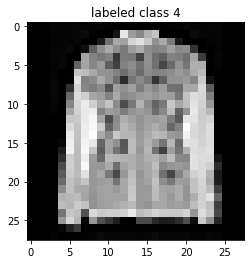

In [17]:
#View the image how it looks
image = np.reshape(fashion_train[fashion_train.columns[1:]].iloc[5].values/255, (28,28))
plt.figure()
plt.title("labeled class {}".format(fashion_train["label"].iloc[5]))
plt.imshow(image,cmap='gray')

In [18]:
# import keras models and layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#### First Simple Neural Network

In [22]:
#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
#                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#### First Convolutional Neural Network

In [23]:
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
#  tf.keras.layers.Flatten(),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dense(10, activation='softmax')

#### First Model Optimization 

In [24]:
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
#  tf.keras.layers.Flatten(),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dense(10, activation='softmax')

#### Second Model Optimization

In [25]:
#1st convolutional layer
#fashion_model3 = Sequential()
#fashion_model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#fashion_model3.add(MaxPooling2D(pool_size=(2, 2)))
#fashion_model3.add(Dropout(0.30))

#2nd convolutional layer
#fashion_model3.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
#fashion_model3.add(MaxPooling2D(pool_size=(2, 2)))
#fashion_model3.add(Dropout(0.30))

#flatten layer
#fashion_model3.add(Flatten())

#dense layers
#fashion_model3.add(Dense(512, activation='relu'))
#fashion_model3.add(Dropout(0.30))
#fashion_model3.add(Dense(10, activation='softmax'))

#### Third Model Optimized

In [7]:
#ADDING MORE CONVOLUTIONAL LAYERS AND DROPOUT LAYER
#Dropout is the method used to reduce overfitting. 
#toforces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase.
def fashion_model():

#1st convolutional layer
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),padding = 'same', activation='relu', input_shape=(28, 28, 1)))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Dropout(0.30))

#2nd convolutional layer
    fashion_model.add(Conv2D(64, kernel_size=(3, 3), padding = 'same', activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Dropout(0.30))

#flatten layer
    fashion_model.add(Flatten())

#dense layers
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.30))
    fashion_model.add(Dense(10, activation='softmax'))

#model complie
    fashion_model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])     
    return fashion_model

### Save Model

In [26]:
# final model save
def final_model():
    # define model
    model = fashion_model()
    #load data
    X_train, Y_train = load_data()
    model.fit(X_train, Y_train, epochs=100)
    model.save('fashion_model.h5')

In [9]:
final_model()



Epoch 1/100
60000/60000 [==============================] - 15s 246us/step - loss: 0.5147 - accuracy: 0.8123
Epoch 2/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.3571 - accuracy: 0.8712
Epoch 3/100
60000/60000 [==============================] - 12s 201us/step - loss: 0.3154 - accuracy: 0.8849
Epoch 4/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.2910 - accuracy: 0.8942
Epoch 5/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.2738 - accuracy: 0.8989
Epoch 6/100
60000/60000 [==============================] - 12s 199us/step - loss: 0.2577 - accuracy: 0.9042
Epoch 7/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.2464 - accuracy: 0.9097
Epoch 8/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.2378 - accuracy: 0.9124
Epoch 9/100
60000/60000 [==============================] - 12s 208us/step - loss: 0.2303 - accuracy: 0.9135
Epoch 10/100
60000/60000 [

In [9]:
#test data
fashion_test = pd.read_csv('D:\\fashion-mnist_test.csv')

#convert into array
f_test = fashion_test.astype("float32")/255

#features for testing
X_test = f_test.iloc[:,1:]

#convert into array
X_test = np.array(X_test, dtype = 'float32')

#Reshape
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

#Shape of test Data
print('Shape of features:',X_test.shape)

#target for testing
Y_test = fashion_test.iloc[:,0]

#convert into array
Y_test = np.array(Y_test, dtype = 'float32')

#Shape of target
print('Shape of target:',Y_test.shape)

Shape of features: (10000, 28, 28, 1)
Shape of target: (10000,)


In [10]:
from keras.models import load_model
model = load_model('final_model.h5')

C:\Users\Keval\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [11]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])  

In [12]:
#eveluate model for test accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)


10000/10000 [==============================] - 4s 382us/step
Test loss 0.20110615355269984
Test accuracy 0.9340000152587891


#### Import_Resize_Reshape_prediction

In [32]:
#import necessary packages for importing image
from scipy.misc import imread
import cv2
import glob
import os

In [33]:
#For inporting multiple images with transformation
folders = glob.glob('D:\\Semester 3\\Machine Learning 2\\resized\\')
imagenames__list = []
for folder in folders:
    for f in glob.glob(folder+'/*'):
       imagenames__list.append(f)

import_img = []
for image in imagenames__list:
    import_img.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE)) #import image directly in grayscale

resize_img = []
for new in import_img:
    resize_img.append(cv2.resize(new, (28,28))) #resize image

reshape_img = []
for new_img in resize_img:
    reshape_img.append(new_img.reshape(1,28,28,1)) #reshape image
 
final_img = []
for f_img in reshape_img:
    final_img.append(f_img.astype("float32")/255) #devide by 255 for normization   

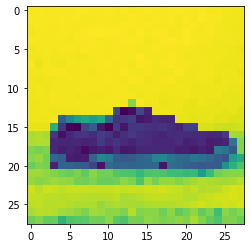

In [39]:
#see the image how ot look after transformation
plt.imshow(resize_img[23])

In [43]:
#create list of 0-30
abc = np.array(list(range(0,30)))
#predicting all the images
for i in abc:
    model.predict_classes(final_img[i])

    print(model.predict_classes(final_img[i]))
    

[3]
[3]
[1]
[1]
[3]
[3]
[3]
[1]
[1]
[1]
[3]
[6]
[3]
[3]
[3]
[3]
[3]
[1]
[3]
[3]
[5]
[3]
[3]
[3]
[3]
[6]
[3]
[3]
[3]
[3]


In [45]:
#Original Class
# 9, 9, 9, 8, 8, 8, 4, 4, 4, 3, 3, 3, 2, 2, 2, 5, 5, 5, 6, 6, 6, 7, 7, 7, 0, 0, 0, 1, 1, 1